In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pywt
import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv("/Users/juntao/Desktop/Data/Apple.csv")

In [3]:
data.describe()

,PX_CLOSE,PX_LOW,PX_OPEN,PX_HIGH
count,8081.000000,8081.000000,8081.000000,8081.000000
mean,17.090829,16.921073,17.103976,17.287317
std,31.512970,31.191687,31.536401,31.889259
min,0.116000,0.114000,0.115000,0.118000
25%,0.368000,0.359000,0.368000,0.375000
50%,2.185000,2.143000,2.185000,2.214000
75%,21.641000,21.455000,21.618000,21.796000
max,182.010000,179.120000,182.630000,182.940000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8081 entries, 0 to 8080
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      8081 non-null   object 
 1   PX_CLOSE  8081 non-null   float64
 2   PX_LOW    8081 non-null   float64
 3   PX_OPEN   8081 non-null   float64
 4   PX_HIGH   8081 non-null   float64
dtypes: float64(4), object(1)
memory usage: 315.8+ KB


In [5]:
data['Date'] = pd.to_datetime(data.Date)
data = data.sort_values('Date')
data = data.set_index('Date')
data = data.loc['2005-10-18':, :]  #DWT requires data length to be 2^n. n is 12 in this case

Text(0.5, 1.0, 'Apple Historical Close Price')

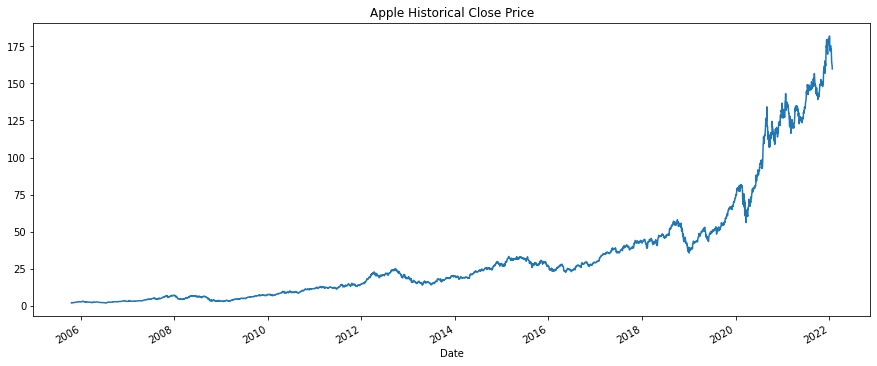

In [6]:
data['PX_CLOSE'].plot(figsize = (15,6))
plt.title('Apple Historical Close Price')

In [7]:
data['PX_CLOSE_return'] = data['PX_CLOSE'].pct_change()
data['PX_LOW_return'] = data['PX_LOW'].pct_change()
data['PX_OPEN_return'] = data['PX_OPEN'].pct_change()
data['PX_HIGH_return'] = data['PX_HIGH'].pct_change()
data['PX_CLOSE_return_sq'] = data['PX_CLOSE_return']**2

In [8]:
df = data.loc[:, 'PX_CLOSE_return': 'PX_CLOSE_return_sq']
df = df.dropna(axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4096 entries, 2005-10-19 to 2022-01-26
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PX_CLOSE_return     4096 non-null   float64
 1   PX_LOW_return       4096 non-null   float64
 2   PX_OPEN_return      4096 non-null   float64
 3   PX_HIGH_return      4096 non-null   float64
 4   PX_CLOSE_return_sq  4096 non-null   float64
dtypes: float64(5)
memory usage: 192.0 KB


Text(0.5, 1.0, 'Apple Historical Close Return')

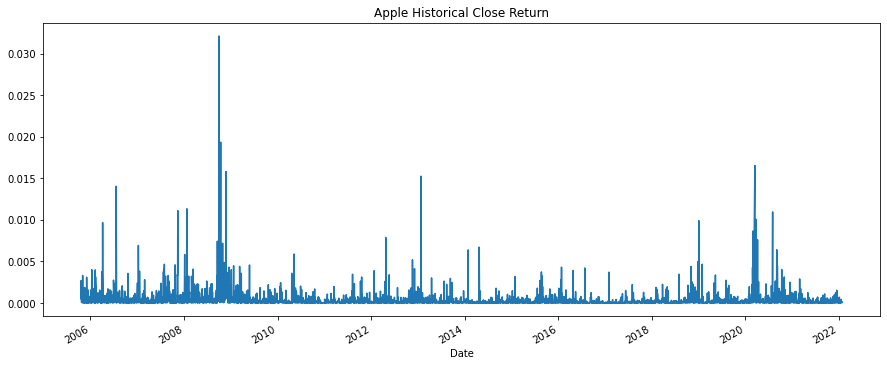

In [9]:
df['PX_CLOSE_return_sq'].plot(figsize = (15,6))
plt.title('Apple Historical Close Return')

Now we start considering the choice of wavelet. In general, it might be desirable to select a wavelet filter that satisfies one or more of the following properties:

1. Symmetry: no phase shift

2. Orthogonality: ensure that wavelet decomposition preserves variance of the original series

3. Smoothness: number of continuous derivatives of the basis function

4. Number of vanishing moments: the ability of the wavelet to account for the behavior of the signal.

Now, Let's take a look at the wavelet families!

In [10]:
family = pywt.families(short=True)
family

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [11]:
w_filter = pywt.wavelist(kind = 'discrete')

Since harr is the same as db1, we remove harr

In [12]:
w_filter.remove('haar')

In [13]:
print(w_filter, len(w_filter))

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20'] 105


Start creating wavelet transformation function. There are a few steps:

1. Destruct series using pywt.wavedec
2. Denoising using soft thresholding
3. reconstruct

Note: the maximum level is 12 since 2**n = 4096, where n = 12. For convenience, we will simply use level = 4. We'll come back to this later. 

In [14]:
def wt(index_list, wavefunc, lv = 4, plot = True): 

    #Denoising
    #soft Threshold Processing Method
    coeff = pywt.wavedec(index_list, wavefunc, mode='sym',level=lv)  # Decomposing by levels，cD is the details coefficient
    sgn = lambda x: 1 if x > 0 else -1 if x < 0 else 0
    # Denoising
    # Soft Threshold Processing Method
    for i in range(1,lv + 1):  # Select m~n Levels of the wavelet coefficients，and no need to dispose the cA coefficients(approximation coefficients)
        Tr = np.sqrt(2 * np.log2(len(coeff[i])))  # Compute Threshold using Stein's Unbiased Risk Estimate (SURE)
        for j in range(len(coeff[i])): #denoise using soft-thresholding
            if (abs(coeff[i][j]) > Tr) :
                coeff[i][j] = sgn(coeff[i][j]) * (abs(coeff[i][j]) - Tr)  
            else:
                coeff[i][j] = 0  # Set to zero if smaller than threshold

    # Reconstructing
    c = pywt.waverec(coeff, wavefunc)
    if len(c) > len(index_list):
        c = c[:-1]

    if plot:
        data = pd.DataFrame({'CLOSE': index_list, 'denoised': c})
        data.plot(figsize=(10, 10), subplots=(2, 1))
        data.plot(figsize=(10, 5))
        plt.show()
    return c

In [15]:
d_close = df['PX_CLOSE_return_sq'].tolist()

In [16]:
res = {}
for ele in w_filter:
    res[ele] = wt(d_close, wavefunc = ele, plot = False)
print(res)

{'bior1.1': array([0.00076368, 0.00076368, 0.00076368, ..., 0.00022952, 0.00022952,
       0.00022952]), 'bior1.3': array([0.00147896, 0.00147896, 0.00060792, ..., 0.00016346, 0.00016346,
       0.00016346]), 'bior1.5': array([0.0010319 , 0.0010319 , 0.0010319 , ..., 0.00015611, 0.00015611,
       0.00015611]), 'bior2.2': array([0.00108578, 0.00102401, 0.00096223, ..., 0.00012828, 0.00011713,
       0.00010598]), 'bior2.4': array([0.00086085, 0.00085203, 0.00084321, ..., 0.0001155 , 0.00011134,
       0.00010717]), 'bior2.6': array([0.00075091, 0.0007663 , 0.00078169, ..., 0.00016821, 0.00017229,
       0.00017637]), 'bior2.8': array([0.00069618, 0.000711  , 0.00072583, ..., 0.00016386, 0.00016637,
       0.00016888]), 'bior3.1': array([-0.00192607, -0.00134944, -0.00081788, ...,  0.00021556,
        0.0002012 ,  0.00018715]), 'bior3.3': array([8.91423599e-04, 8.17965171e-04, 7.43697515e-04, ...,
       9.88617418e-05, 9.49342574e-05, 9.29144197e-05]), 'bior3.5': array([0.00080596, 0.0

There are various way to measure the performance of the wavelet filter. For example, Signal-to-noise ratio (SNR), RMSE, correlation. We will start with SNR first. The function signaltonoise calculate SNR. Higher SNR shows a better performance.

In [17]:
#def signaltonoise(denoised, ori, axis=0, ddof=0):

#    d = np.asarray(denoised)
#    o = np.asarray(ori)
#    numerator = sum(o**2)
#    denominator = sum(abs(o-d))

#   return 10*np.log10(numerator/denominator)

In [18]:
#SNR = {}
#for i in w_filter:
#    SNR[i] = signaltonoise(denoised = res[i], ori = d_close)

SNR

Our SNR are negative, meaning signal power is less than noise power (more noise than signal). Now let's take a look at ARIMA model. 

First, I want to implement the Augmented Dickey-Fuller test to see if my Apple Historical Close Return is stationary. 

In [19]:
result = adfuller(df['PX_CLOSE_return'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -14.882821
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


The ADF test shows that the dataset is stationary. Now I want to see the ACF and PACF plot

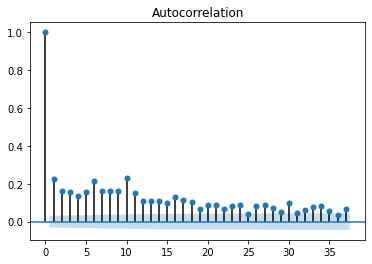

In [20]:
#plot_acf(df['PX_CLOSE_return'])
plot_acf(df['PX_CLOSE_return_sq'])
pyplot.show()

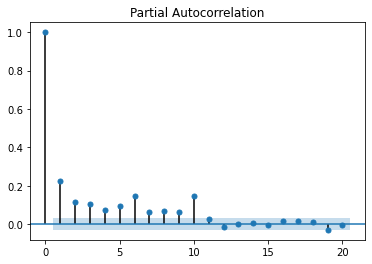

In [21]:
#plot_pacf(df['PX_CLOSE_return'], lags=20)
plot_pacf(df['PX_CLOSE_return_sq'], lags=20)
pyplot.show()

We see a gradual decrease in the ACF chart and a sharp decrease after 10 significant lags. Therefore, AR process might be more appropriate. Therefore, I want to try out AR(10). 

In [22]:
AR_10 = AutoReg(df['PX_CLOSE_return_sq'], lags = 10).fit()
pred = AR_10.predict(start = len(df['PX_CLOSE_return_sq']), end = len(df['PX_CLOSE_return_sq'])+5)

/Users/juntao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/juntao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


Now, let me import test data

In [23]:
test = pd.read_csv("/Users/juntao/Desktop/Data/AAPL_test.csv")
test.describe()

,PX_OPEN,PX_HIGH,PX_LOW,PX_CLOSE
count,18.000000,18.000000,18.000000,18.000000
mean,170.826944,172.637000,168.624444,170.342778
std,3.831588,3.718311,4.771675,5.455366
min,162.450000,163.840000,157.820000,159.220000
25%,169.905000,170.883250,166.930000,168.880000
50%,171.705000,173.643000,170.150000,172.255000
75%,173.722500,175.262500,171.520000,174.182500
max,176.050000,176.650000,174.900000,176.280000


In [24]:
test['Date'] = pd.to_datetime(test.Date)
test = test.sort_values('Date')
test = test.drop(['Date'], axis = 1)
test = test.set_index(pd.Index([i for i in range(4095, 4113)])) #note, we adjust something like this because the returns of my traing data starts with 0. 
print(test)

      PX_OPEN  PX_HIGH  PX_LOW  PX_CLOSE
4095  163.500  164.389  157.82    159.78
4096  162.450  163.840  158.28    159.69
4097  165.710  170.350  162.80    159.22
4098  170.160  175.000  169.51    170.33
4099  174.010  174.840  172.31    174.78
4100  174.745  175.880  173.33    174.61
4101  174.480  176.240  172.12    175.84
4102  171.680  174.100  170.68    172.90
4103  172.860  173.946  170.95    172.39
4104  171.730  175.350  171.43    171.66
4105  176.050  176.650  174.90    174.83
4106  174.140  175.480  171.55    176.28
4107  172.330  173.080  168.04    172.12
4108  167.370  169.580  166.56    168.64
4109  170.970  172.950  170.25    168.88
4110  171.850  173.340  170.05    172.79
4111  171.030  171.910  168.47    172.55
4112  169.820  170.541  166.19    168.88


In [25]:
test['PX_CLOSE_return'] = test['PX_CLOSE'].pct_change()
test['PX_LOW_return'] = test['PX_LOW'].pct_change()
test['PX_OPEN_return'] = test['PX_OPEN'].pct_change()
test['PX_HIGH_return'] = test['PX_HIGH'].pct_change()
test['PX_CLOSE_return_sq'] = test['PX_CLOSE_return']**2
df_test = test.loc[:, 'PX_CLOSE_return': 'PX_CLOSE_return_sq']
df_test = df_test.dropna(axis = 0)

In [26]:
df_test.head()

,PX_CLOSE_return,PX_LOW_return,PX_OPEN_return,PX_HIGH_return,PX_CLOSE_return_sq
4096,-0.000563,0.002915,-0.006422,-0.003340,3.172782e-07
4097,-0.002943,0.028557,0.020068,0.039734,8.662441e-06
4098,0.069778,0.041216,0.026854,0.027297,4.868923e-03
4099,0.026126,0.016518,0.022626,-0.000914,6.825551e-04
4100,-0.000973,0.005920,0.004224,0.005948,9.460506e-07


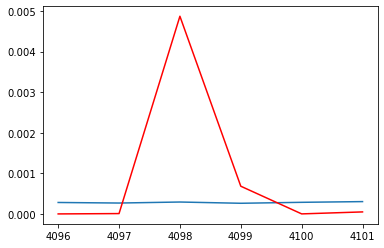

In [27]:
pyplot.plot(pred)
pyplot.plot(df_test['PX_CLOSE_return_sq'][:6], color='red')

In [28]:
mse = mean_squared_error(df_test['PX_CLOSE_return_sq'][:6], pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df_test['PX_CLOSE_return_sq'][:6], pred)

In [29]:
print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)

RMSE: 0.001888807977576968
MSE: 3.5675955761583964e-06
MAE: 0.0010126896178066034


We have seen the RMSE, MAE, and MSE without wavelet filter. Now we want to see if wavelet filter can improve the performance. 

In [30]:
pred_filter = {}
metrics = pd.DataFrame(columns = ['RMSE', 'MSE', 'MAE'], index = list(res.keys()))

In [31]:
for k,v in res.items():
    ar = AutoReg(v, lags = 10).fit()
    pred_filter[k] = ar.predict(start = len(v), end = len(v)+5)
    
    mse = mean_squared_error(df_test['PX_CLOSE_return_sq'][:6], pred_filter[k])
    metrics.loc[k, 'MSE'] = mse
    metrics.loc[k, 'RMSE'] = np.sqrt(mse)
    metrics.loc[k, 'MAE'] = mean_absolute_error(df_test['PX_CLOSE_return_sq'][:6], pred)

In [32]:
print(metrics)

               RMSE          MSE         MAE
bior1.1  0.00190324  3.62233e-06  0.00101269
bior1.3  0.00192364  3.70039e-06  0.00101269
bior1.5  0.00192648  3.71133e-06  0.00101269
bior2.2  0.00196797  3.87292e-06  0.00101269
bior2.4   0.0019588  3.83688e-06  0.00101269
...             ...          ...         ...
sym16     0.0019221  3.69449e-06  0.00101269
sym17    0.00192047  3.68822e-06  0.00101269
sym18     0.0019248  3.70485e-06  0.00101269
sym19    0.00192488  3.70516e-06  0.00101269
sym20      0.001922  3.69408e-06  0.00101269

[105 rows x 3 columns]


In [33]:
mini = metrics.min()
print(mini)

RMSE    0.001892
MSE     0.000004
MAE     0.001013
dtype: float64


In [34]:
break

SyntaxError: 'break' outside loop (<ipython-input-34-6aaf1f276005>, line 1)

In [ ]:
#wavelet = pywt.Wavelet('gaus1')
#print(wavelet)

In [ ]:
#print(data.loc[:, 'PX_CLOSE_return':].describe())

#d = data['PX_CLOSE'].tolist()

#start plotting
#plt.plot(d, 'b')
#plt.title('Historical Apple Stock Price')
#plt.xlabel('time')
#plt.ylabel('stock price')
#plt.show()


#coe = wt(d, plot = True)